In [1]:
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import datetime
import empyrical
from matplotlib import cm, pyplot as plt
from matplotlib.finance import quotes_historical_yahoo_ochl
%matplotlib inline

In [2]:
df = pd.read_excel('../data/assets.xlsx')

In [20]:
df['stock return'] = df['881001.WI'].pct_change().rolling(window=121).apply(lambda x: empyrical.cum_returns_final(x))
df['stock volatility'] = df['881001.WI'].pct_change().rolling(window=121).apply(lambda x: empyrical.annual_volatility(x))
# df['bond return'] = df['065.CS'].pct_change().rolling(window=20).mean()
# df['bond volatility'] = df['065.CS'].pct_change().rolling(window=242).std()

In [21]:
df.dropna(inplace=True)

In [22]:
df.head()

,881001.WI,HSI.HI,SPX.GI,065.CS,AU9999.SGE,B.IPE,H11025.CSI,stock return,stock volatility
2009-06-30,2500.6418,18378.7305,919.32,128.2686,207.41,0.0,1098.2222,0.712729,0.309977
2009-07-01,2547.8818,18378.7305,923.33,128.2311,205.16,0.0,1098.2640,0.747593,0.310527
2009-07-02,2579.7644,18178.0508,896.42,128.2277,206.47,0.0,1098.3063,0.785596,0.310066
2009-07-03,2611.1880,18203.4004,896.42,128.2130,205.75,0.0,1098.3546,0.824994,0.309499
2009-07-06,2643.4385,17979.4102,898.72,128.1979,203.80,0.0,1098.4527,0.778759,0.305827


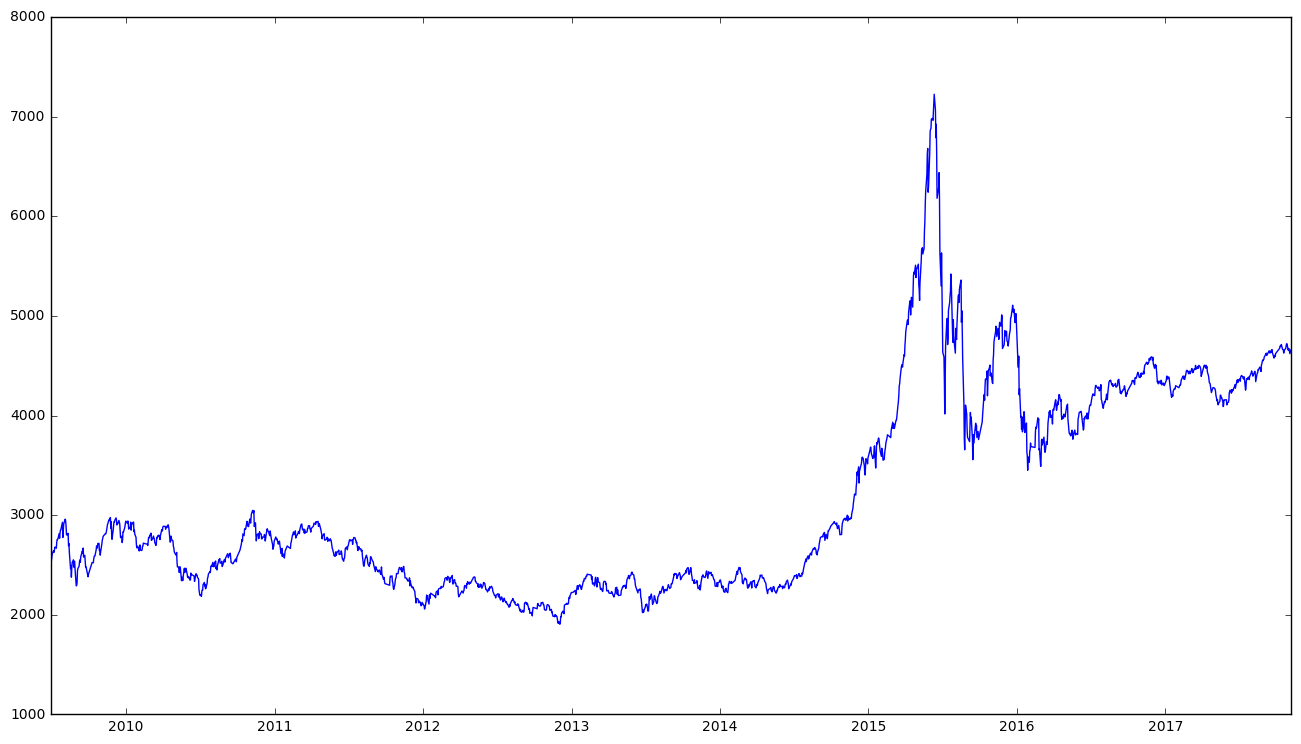

In [23]:
plt.figure(figsize=(16, 9))
plt.plot(df['881001.WI'])

In [37]:
X = np.column_stack([
#         df['881001.WI'],
#         df['stock return'], 
        df['stock volatility'],
    ])

In [38]:
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
hmm_model.fit(X)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\deprecat

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


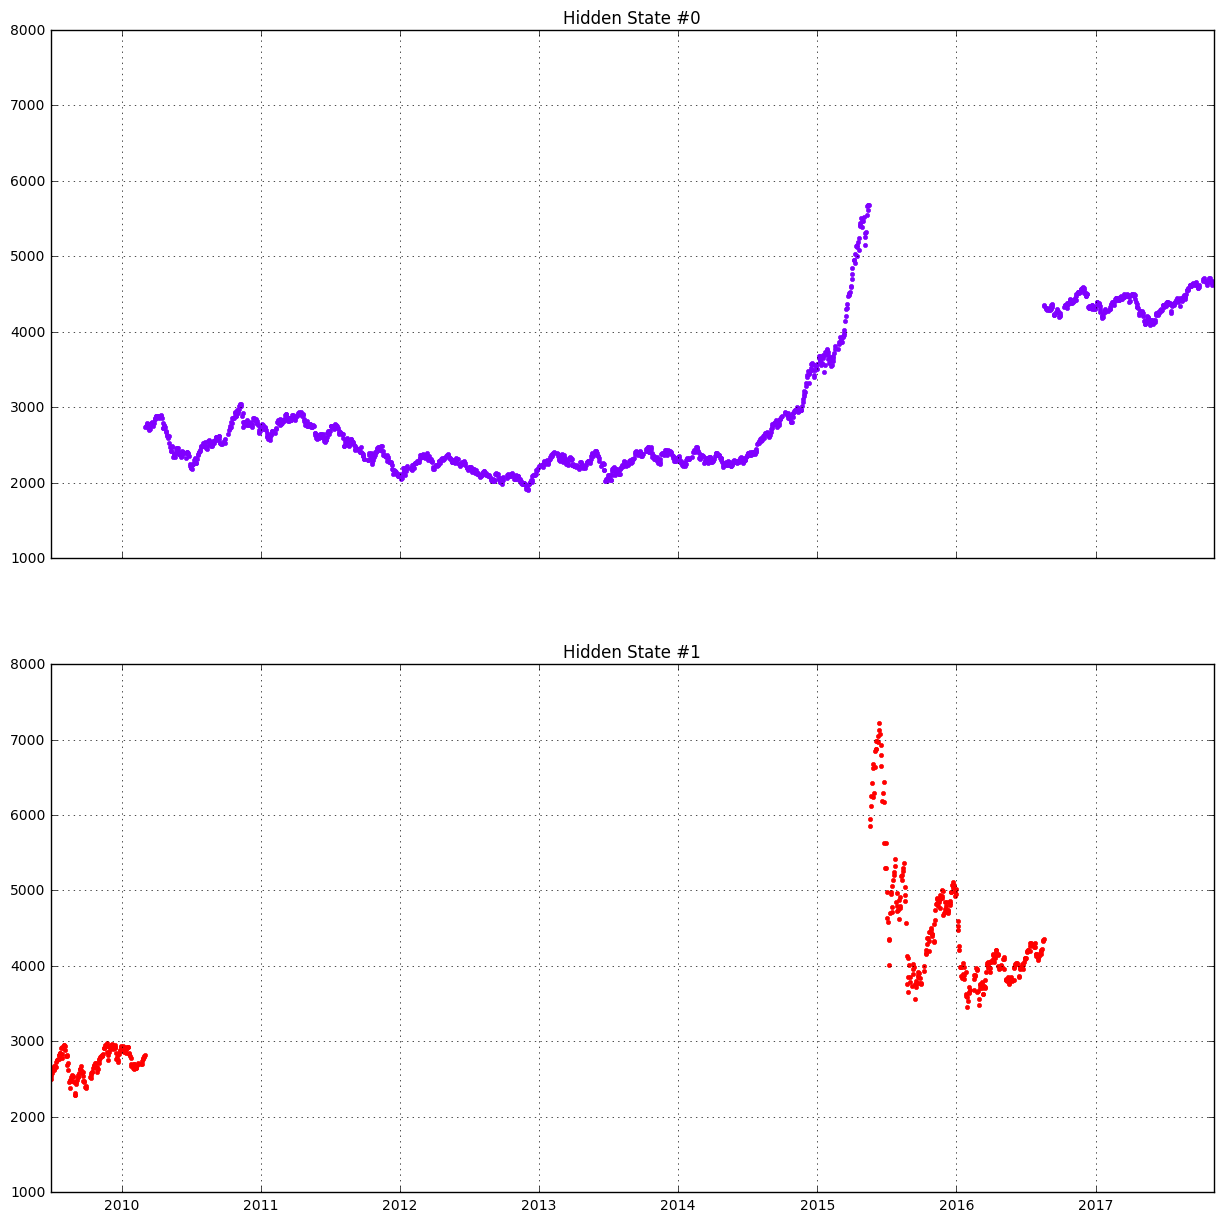

In [39]:
hidden_states = hmm_model.predict(X)
fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
fig.set_figheight(15)
fig.set_figwidth(15)
colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot(
            df.index[mask], 
            df["881001.WI"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
#         ax.xaxis.set_major_locator(YearLocator())
#         ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)

In [40]:
hmm_model.transmat_

array([[  9.99357246e-01,   6.42754404e-04],
       [  4.22097343e-03,   9.95779027e-01]])

In [41]:
df['stock return'][df.index[hidden_states==0]].mean()

0.053175051200260656

In [42]:
df['stock return'][df.index[hidden_states==1]].mean()

0.12889856175341033

In [43]:
df['stock return'][df.index[hidden_states==2]].mean()

nan

In [44]:
df['stock volatility'][df.index[hidden_states==0]].mean()

0.1914425457341867

In [45]:
df['stock volatility'][df.index[hidden_states==1]].mean()

0.4089581194275462

In [36]:
df['stock volatility'][df.index[hidden_states==2]].mean()

nan